# Project: 2010 Federal STEM education data analysis 

## An exploratory data science project

Data: https://data.world/education/2010-federal-stem-inventory/file/2010%20Federal%20STEM%20Education%20Inventory%20Data%20Set.xls
 
Stage 1:
1) Calculate % growth of funding between year 2008 & 2009.
2) If funding is positive, tag it as 1, if funding is negative tag it as 0. This is the target variable.
 
Stage 2:
1) Create graphs of univariate distribution of all non funding variables and share on a jupyter notebook. Just FYI - Funding FY2008, FY2009, FY2010 are the "funding variables"
2) Calculate mutual_info_score of target variable created in stage 1 & ALL non funding variables and share on a jupyter notebook.
 
Stage 3:
1) Divide data into train & test samples. (70-30 split)
2) Select features & build xgboost model. You will be judged on roc_auc_score on test sample.
3) Write testcases on all user defined functions using pytest framework. This is one of the most important steps of this interview.

# Stage 1: Solutions

Calculation of %Growth of funding between year 2008 & 2009 and finding specified target variable

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Render plots inline
%matplotlib inline

In [2]:
# Importing data from excel file
data = pd.read_excel('Data/2010 Federal STEM Education Inventory Data Set.xls',header=None)

In [3]:
# Looking at the first few rows of the data set.
data.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,NaN,PROGRAM,NaN,NaN,NaN,FUNDING,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,NaN,NaN,Y3) Process or Implementation Evaluation Type,NaN,NaN,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
2,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
3,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
4,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5,5,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [4]:
# Changing columns
columns = data.iloc[1].values

In [5]:
data.columns = columns

In [6]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
0,NaN,PROGRAM,NaN,NaN,NaN,FUNDING,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,NaN,NaN,Y3) Process or Implementation Evaluation Type,NaN,NaN,Y4) Portfolio Evaluation/Review Type,NaN,NaN,Y5) Expert Review Type,NaN
2,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
3,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
4,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5,5,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [7]:
# Now shifting the rows by two steps to get the desired dataframe.
data = data.shift(periods=-2)

In [8]:
data.head()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
0,PRG_0001,Centers for Ocean Sciences Education Excellence ~,National Science Foundation,Directorate for Geosciences (GEO),The Division of Ocean Sciences seeks to establ...,2002,5.24,7.19,5.7,General STEM,...,NaN,NaN,NaN,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
1,PRG_0002,Broadening Participation in Computing (BPC),National Science Foundation,Directorate for Computer & Information Science...,The BPC Program was not primarily aimed at edu...,2006,14,14,14,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
2,PRG_0003,CISE Pathways to Revitalized Undergraduate Com...,National Science Foundation,Directorate for Computer & Information Science...,Through the CISE Pathways to Revitalized Under...,2007,5,5,4.37,General STEM,...,NaN,NaN,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
3,PRG_0004,Opportunities for Enhancing Diversity in the G...,National Science Foundation,Directorate for Geosciences (GEO),The Opportunities for Enhancing Diversity in t...,2002,4.57,11.79,4.18,General STEM,...,NaN,NO,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN,NaN,INDEPENDENT,NaN
4,PRG_0005,Geoscience Education,National Science Foundation,Directorate for Geosciences (GEO),The Geoscience Education (GeoEd) program is fo...,1999,1.63,2.74,2.02,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [9]:
data.tail()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
250,PRG_0326,AgDiscovery,Agriculture,APHIS,AgDiscovery is an outreach program to help stu...,NaN,NaN,NaN,0.488,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,PRG_0327,SMART Grants,Education,Office of Postsecondary Education (OPE),The National Science and Mathematics Access to...,2006,194,341,379.776,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
252,NaN,NaN,NaN,NaN,NaN,NaN,2796.84,3354.39,3425.29,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Removing the na values from the tail of the dataframe.
data = data.drop([252,253,254])

In [11]:
data.tail()

,Index Number,Investment Name,Agency,Subagency,A) Brief Description,B) Year Established,C1) Funding FY2008,C2) Funding FY2009,C3) Funding FY2010,D) Mission-specific or General STEM?,...,nan,nan,Y3) Process or Implementation Evaluation Type,nan,nan,Y4) Portfolio Evaluation/Review Type,nan,nan,Y5) Expert Review Type,nan
247,PRG_0321,Research on Gender in Science and Engineering ...,National Science Foundation,Directorate for Education and Human Resources ...,The Research on Gender in Science and Engineer...,1993,10.13,11.4,11.57,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
248,PRG_0324,CITEAM,National Science Foundation,Office of Cyberinfrastructure (OCI),The CI-TEAM program supports local and large s...,2006,9.9,0,4.85,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN
249,PRG_0325,NHLBI HBCU Research Scientist Award,Health & Human Services,"National Heart, Lung, and Blood Institute (NHLBI)",The NHLBI supports cooperative agreement grant...,2001,0.476,0.486,0.476,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,PRG_0326,AgDiscovery,Agriculture,APHIS,AgDiscovery is an outreach program to help stu...,NaN,NaN,NaN,0.488,Agency Mission Workforce,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,PRG_0327,SMART Grants,Education,Office of Postsecondary Education (OPE),The National Science and Mathematics Access to...,2006,194,341,379.776,General STEM,...,NaN,NO,NaN,NaN,NO,NaN,NaN,NO,NaN,NaN


In [12]:
# Checking if the funding for the years 2008,2009 is null value.
data['C1) Funding FY2008'].isnull().sum()

22

In [13]:
# Filling null values with zero for the funding.
data['C1) Funding FY2008'] = data['C1) Funding FY2008'].fillna(0)

In [14]:
data['C2) Funding FY2009'] = data['C2) Funding FY2009'].fillna(0)

In [15]:
data['C1) Funding FY2008'].isnull().sum()

0

In [16]:
data['C2) Funding FY2009'].isnull().sum()

0

In [17]:
# Function to calculate growth between two numeric values.
def growth(initial,final):
    '''
    returns the growth between two values of the
    same variables in succesive time period.

    initial: non-negative value
    final: non-negative value

    '''
    if not (isinstance(initial,(float,int)) or isinstance(final,(float,int))):
        raise TypeError('Invalid input')
    if initial>0:
        return ((final-initial)/initial)*100
    else:
        return (final-initial)*100

In [18]:
# Applying growth function on the required rows of dataframe and creating % Growth column.
data['% Growth'] = data.apply(lambda row: growth(row['C1) Funding FY2008'], row['C2) Funding FY2009']), axis=1)

In [19]:
# Now we can check the % Growth column
data['% Growth'].head()

0     37.213740
1      0.000000
2      0.000000
3    157.986871
4     68.098160
Name: % Growth, dtype: float64

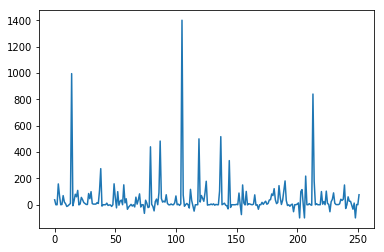

In [20]:
# Let's plot the % Growth
data['% Growth'].plot()

In [21]:
# Function to find the target variable based on the % Growth values
def find_target(growth_val):
    '''
    returns the target value.
    If growth is positive returns 1.
    if growth is negative returns 0.

    '''
    if growth_val>0:
        return 1
    else:
        return 0


In [22]:
# Creating a Target column by applying find_target function to % Growth column.
data['Target'] = data.apply(lambda row: find_target(row['% Growth']),axis=1)

In [23]:
data['Target'].head()

0    1
1    0
2    0
3    1
4    1
Name: Target, dtype: int64

# Stage 2.1: Solutions

## Plotting univariate distribution of all non-funding variables
In order to plot all the non-funding variables, the category of all non-funding variables are taken
as separate dataframes and the customized plotting functions are used to plot their univariate 
distribution.

Conventions taken for naming of dataframe variables are according to their respective category name 
or alpha-numeric serial numbers.

In [24]:
# Customized plotting function for sub-dataframes.
def graph_plot_df(df):
    title  = df.columns[0]
    df.columns = df.columns.fillna(title)
    df = df.describe().iloc[[0,2]]
    df.columns = df.iloc[1].values
    df = df.drop('top',axis=0)
    new_labels = [i.split(':', 1)[0] for i in df.columns.values]
    ax = df.plot(kind='bar',rot=0)
    ax.legend(new_labels,bbox_to_anchor=(1, 1))
    return plt.suptitle(title, fontsize=20)

In [25]:
# Customized plotting function for sub-series.
def graph_plot_sr(sr,size=None,rot=90):
    title  = sr.columns[0]
    sr = sr.iloc[:,0]
    ax = sr.value_counts().plot(kind='bar',figsize=size,rot=rot)
    return plt.suptitle(title, fontsize=20)

In [26]:
# Filling the na column names with the first column name
def fill_col_na(df):
    df.columns = df.columns.fillna(df.columns[0])
    return df.columns

Text(0.5,0.98,'Agency')

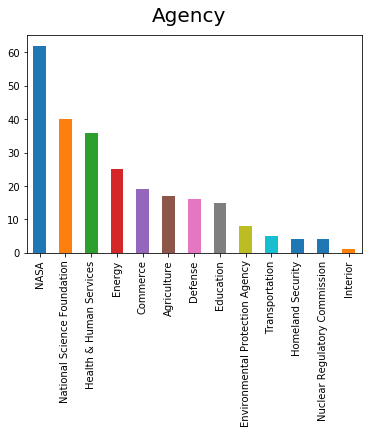

In [27]:
agency = data.iloc[:,2:3]
graph_plot_sr(agency)

Text(0.5,0.98,'Subagency')

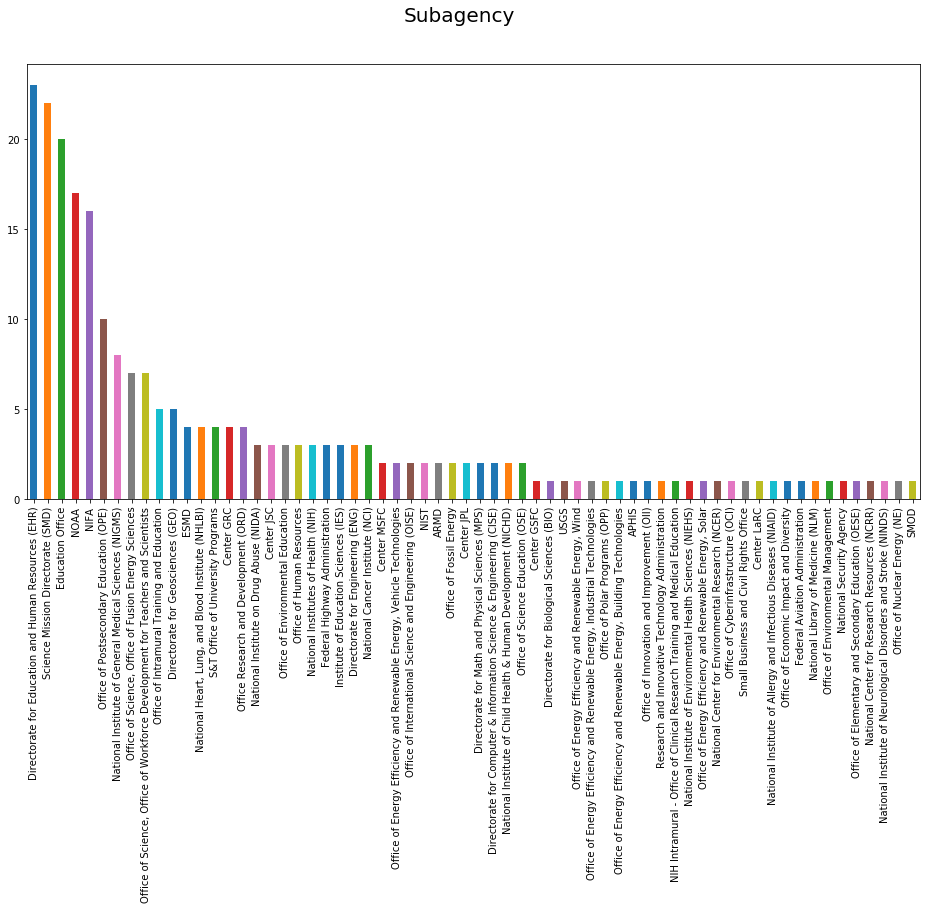

In [28]:
sub_agency = data.iloc[:,3:4]
graph_plot_sr(sub_agency,(16,8))

Text(0.5,0.98,'D) Mission-specific or General STEM?')

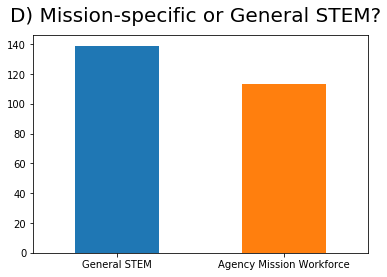

In [29]:
D = data.iloc[:,9:10]
graph_plot_sr(D,rot=0)

Text(0.5,0.98,'E) Agency or Mission-Related Workforce Needs?')

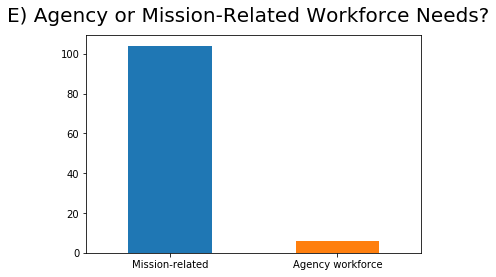

In [30]:
E = data.iloc[:,10:11]
graph_plot_sr(E,rot=0)

[Text(0,0,'Post-Secondary STEM Degrees'),
 Text(0,0,'Learning'),
 Text(0,0,'Engagement'),
 Text(0,0,'STEM Careers'),
 Text(0,0,'Pre and In Service Educator/Education Leader Performance'),
 Text(0,0,'Institutional Capacity'),
 Text(0,0,'Education Research and Development')]

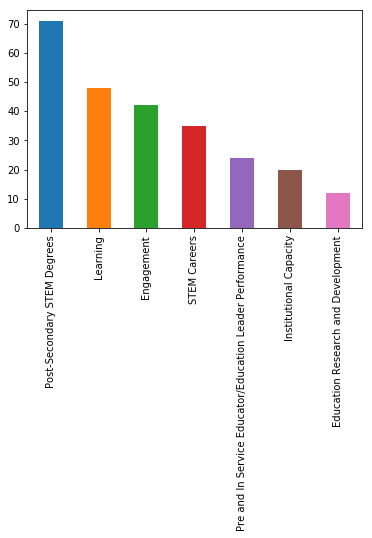

In [31]:
F1 = data.iloc[:,11:12]
F1_sub = data.iloc[:,11]
new_labels = [i.split(':', 1)[0] for i in F1_sub.value_counts().index]
F1_sub.value_counts().plot(kind='bar',rot=90).set_xticklabels(new_labels)

Text(0.5,0.98,'F2) Secondary Investment Objectives')

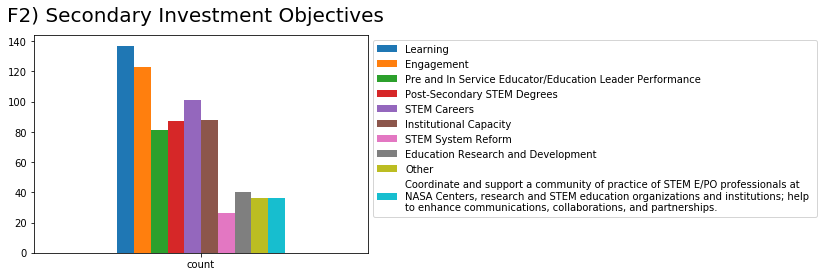

In [32]:
F2 = data.iloc[:,12:22]
graph_plot_df(F2)

Text(0.5,0.98,'G1) Primary Research Approaches')

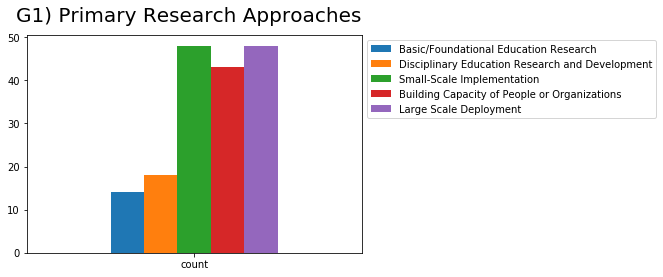

In [33]:
G1 = data.iloc[:,22:27]
graph_plot_df(G1)

Text(0.5,0.98,'G2) Secondary Research Approaches')

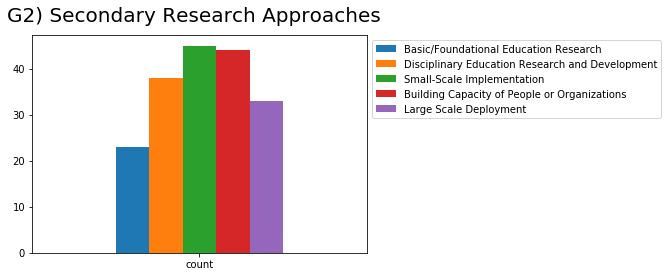

In [34]:
G2 = data.iloc[:,27:32]
graph_plot_df(G2)

Text(0.5,0.98,'G3) Research Approaches Not Used')

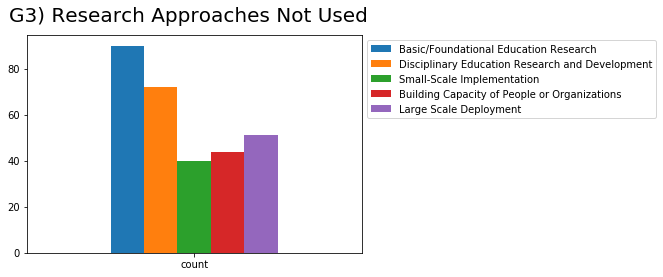

In [35]:
G3 = data.iloc[:,32:37]
graph_plot_df(G3)

Text(0.5,0.98,'H) Educational Services or Products Produced')

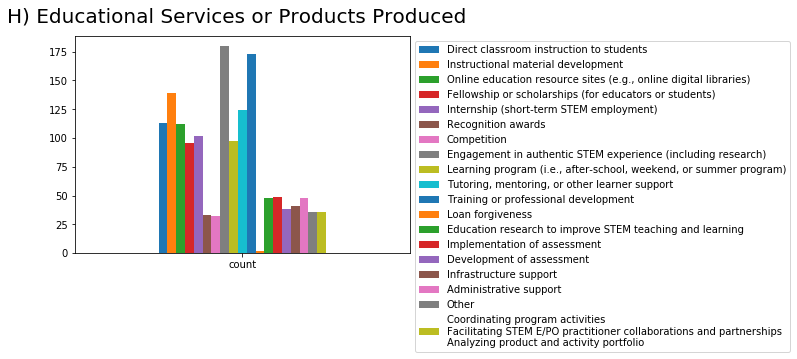

In [36]:
H = data.iloc[:,37:56]
graph_plot_df(H)

Text(0.5,0.98,'I1) STEM Learners Targeted? Specify.')

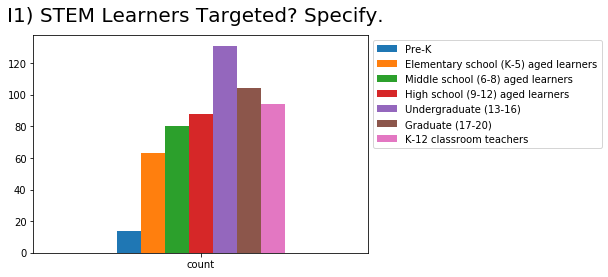

In [37]:
I1 = data.iloc[:,56:64]
fill_col_na(I1)
I1_1 = I1.iloc[:,0:1]
I1_2 = I1.iloc[:,1:]

graph_plot_df(I1_2)

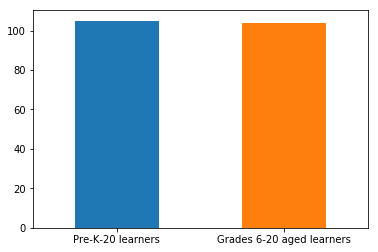

In [38]:
I1_1.iloc[:,0].value_counts().plot(kind='bar',rot=0)

Text(0.5,0.98,'I1) STEM Learners Targeted? Specify.')

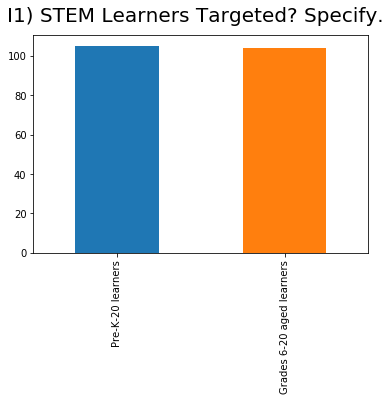

In [39]:
graph_plot_sr(I1_1)

Text(0.5,0.98,'I2) Pre-service-service STEM Teachers Targeted? Specify.')

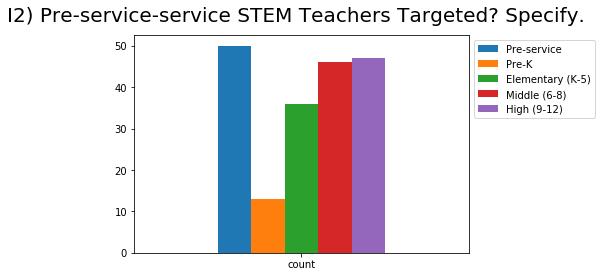

In [40]:
I2 = data.iloc[:,64:69]
graph_plot_df(I2)

Text(0.5,0.98,'I3) In-service STEM Teachers Targeted? Specify.')

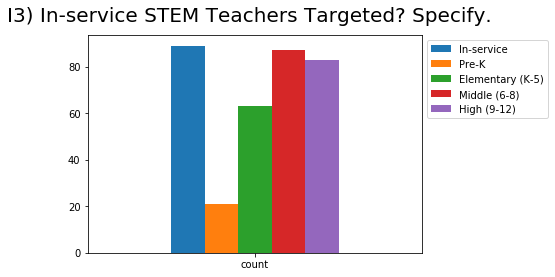

In [41]:
I3 = data.iloc[:,69:74]
graph_plot_df(I3)

Text(0.5,0.98,'I4) Adult Learners Targeted?')

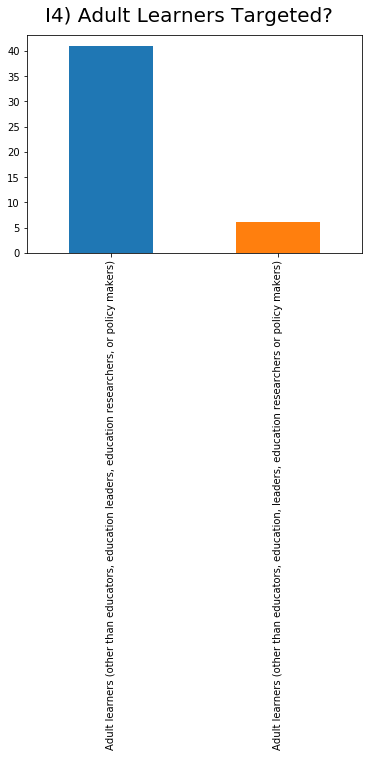

In [42]:
I4 = data.iloc[:,74:75]
graph_plot_sr(I4,rot=90)

Text(0.5,0.98,'I5) Education Researchers Targeted? ')

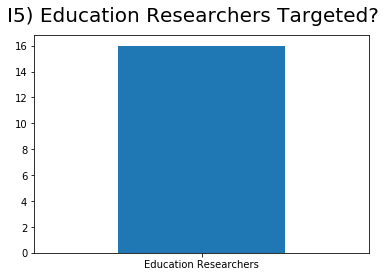

In [43]:
I5 = data.iloc[:,75:76]
graph_plot_sr(I5,rot=0)

Text(0.5,0.98,'I6) K-12 Staff/Administrators Targeted? Specify.')

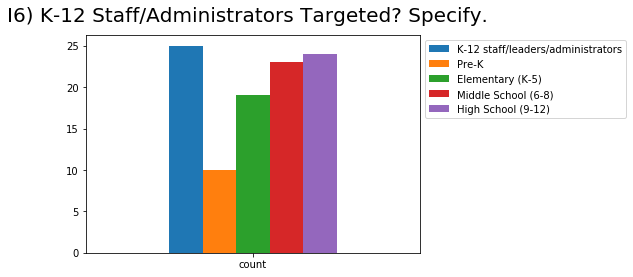

In [44]:
I6 = data.iloc[:,76:81]
graph_plot_df(I6)

Text(0.5,0.98,'I7) Post-secondary Instructors Targeted? Specify.')

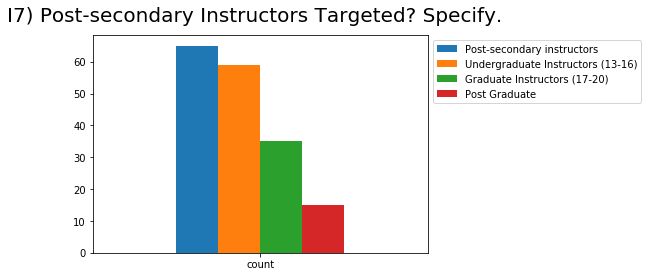

In [45]:
I7 = data.iloc[:,81:85]
graph_plot_df(I7)

Text(0.5,0.98,'I8) Post-secondary Staff Targeted? Specify.')

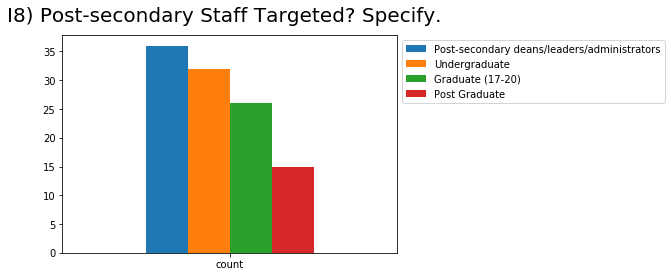

In [46]:
I8 = data.iloc[:,85:89]
graph_plot_df(I8)

Text(0.5,0.98,'I9) Informal STEM Educators Targeted?')

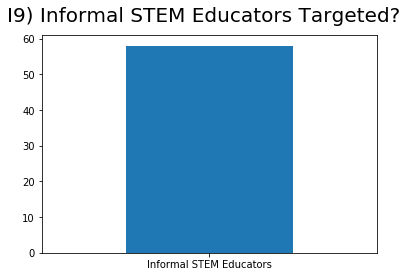

In [47]:
I9 = data.iloc[:,89:90]
graph_plot_sr(I9,rot=0)

Text(0.5,0.98,'I10) Other Informal STEM Education Staff Targeted?')

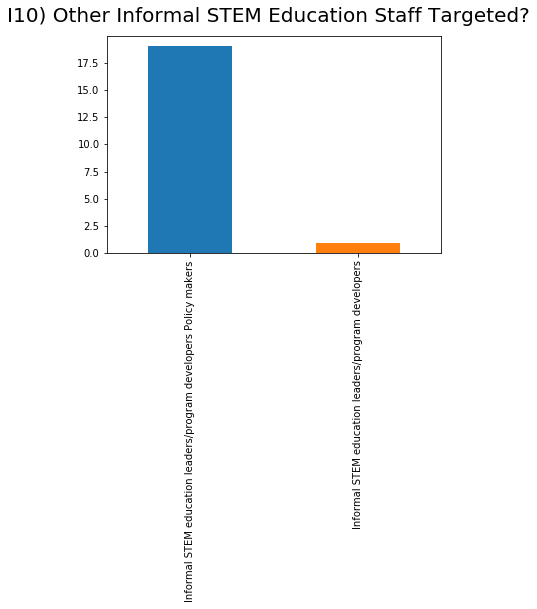

In [48]:
I10 = data.iloc[:,90:91]
graph_plot_sr(I10)

Text(0.5,0.98,'I11) Other Target Group?')

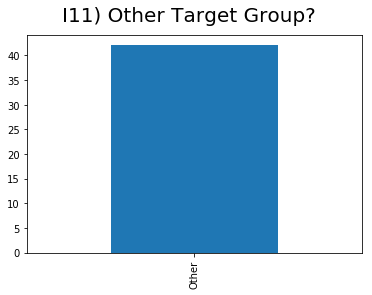

In [49]:
I11 = data.iloc[:,91:93]
fill_col_na(I11)
I11_1 = I11.iloc[:,0:1]
I11_2 = I11.iloc[:,1:2]
graph_plot_sr(I11_1)

Text(0.5,0.98,'I11) Other Target Group?')

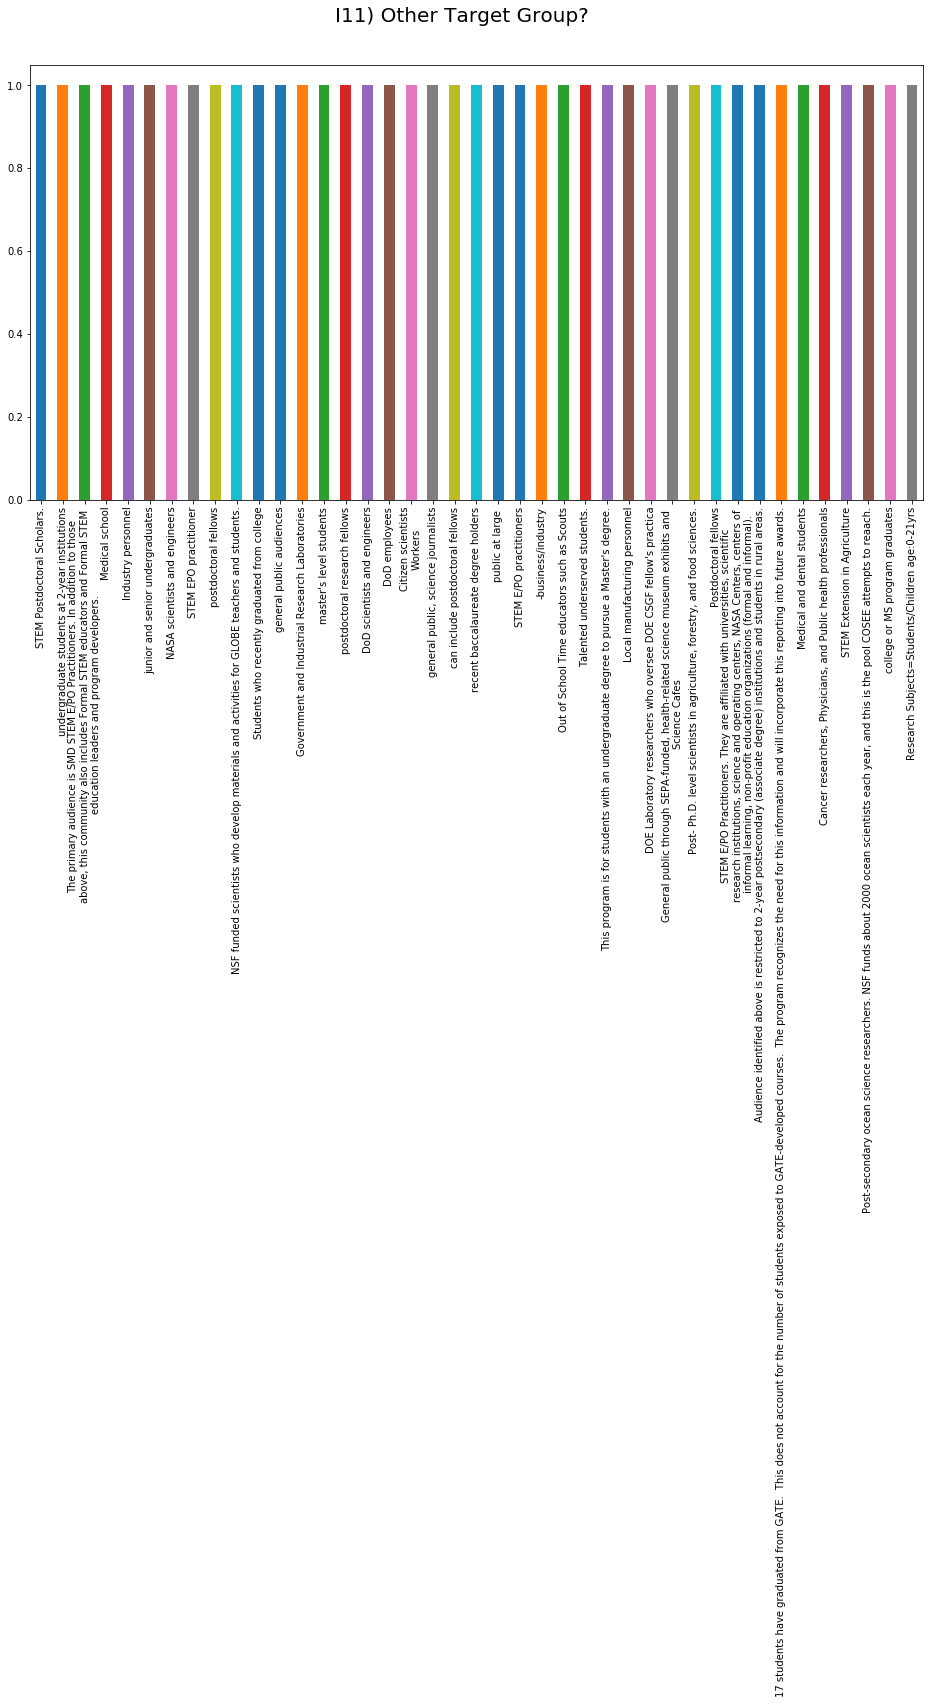

In [50]:
graph_plot_sr(I11_2,size=(16,8))

Text(0.5,0.98,'J) Focus on Underrepresented Groups in STEM')

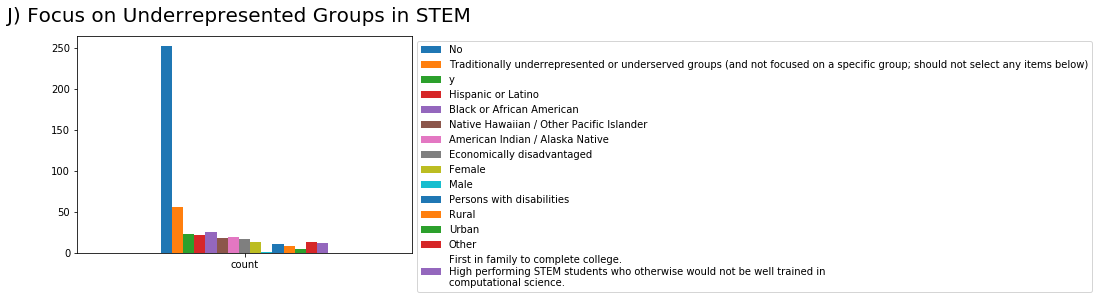

In [51]:
J = data.iloc[:,93:108]
graph_plot_df(J)

Text(0.5,0.98,'K) Eligibility Restrictions')

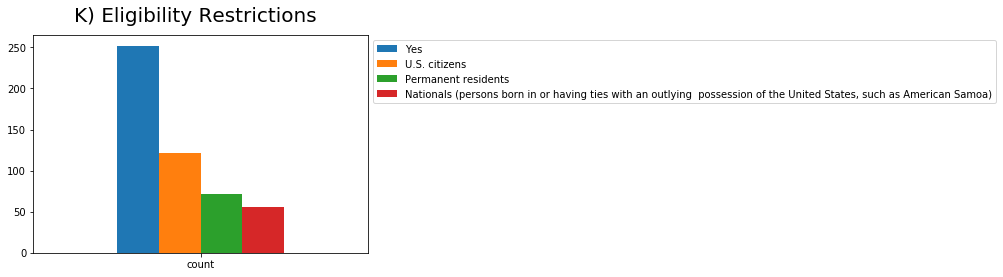

In [52]:
K = data.iloc[:,108:112]
graph_plot_df(K)

Text(0.5,0.98,'L) Minority Serving Institutions')

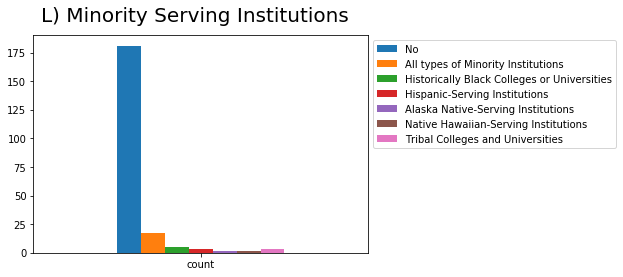

In [53]:
L = data.iloc[:,112:119]
graph_plot_df(L)

Text(0.5,0.98,'M) Geographic Region')

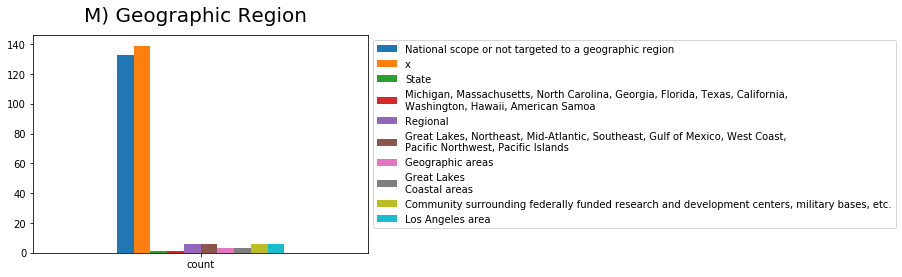

In [54]:
M = data.iloc[:,119:129]
graph_plot_df(M)

Text(0.5,0.98,'N) STEM Discipline Focus')

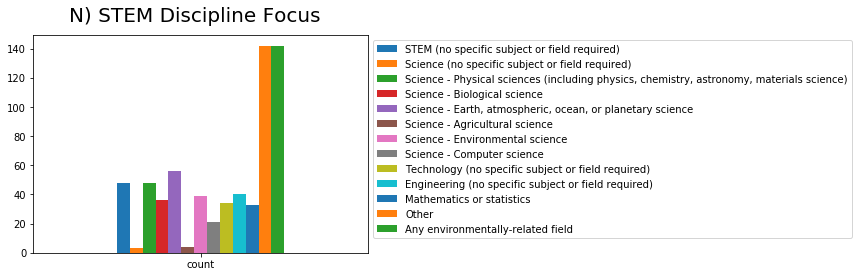

In [55]:
N = data.iloc[:,129:142]
graph_plot_df(N)

Text(0.5,0.98,'O) Organization or Individual Funded')

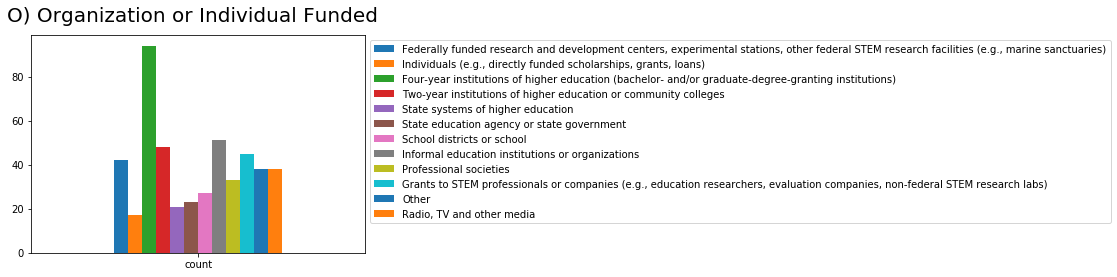

In [56]:
O = data.iloc[:,142:154]
graph_plot_df(O)

Text(0.5,0.98,'P) External Funding Allocation')

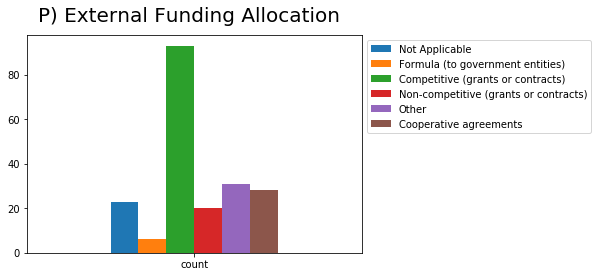

In [57]:
P = data.iloc[:,154:160]
graph_plot_df(P)

Text(0.5,0.98,'Q) Legislation Required to Shift Focus?')

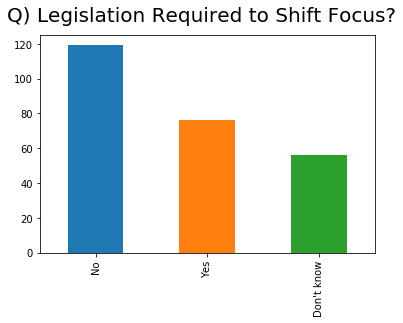

In [58]:
Q = data.iloc[:,160:161]
graph_plot_sr(Q)

Text(0.5,0.98,'R1) Joint Funding of Investment (with Agencies)')

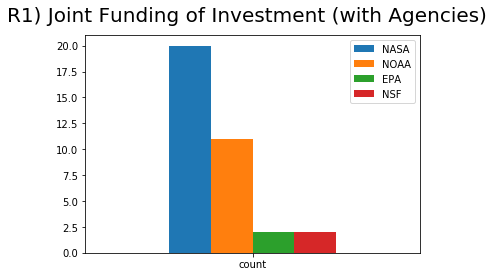

In [59]:
R1 = data.iloc[:,161:174]
fill_col_na(R1)
R1_sub = R1.iloc[:,[1,4,7,10]]
graph_plot_df(R1_sub)

Text(0.5,0.98,'R2) Joint Funding of Investment (with Other)')

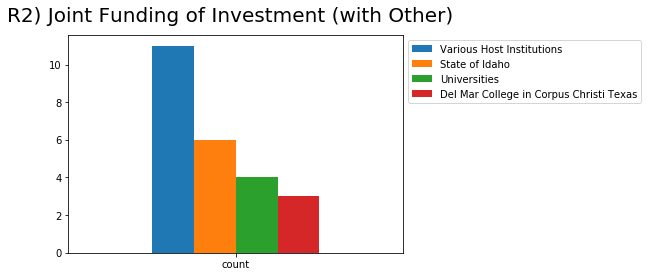

In [60]:
R2 = data.iloc[:,174:186]
fill_col_na(R2)
R2_sub = R2.iloc[:,[0,3,6,9]]
graph_plot_df(R2_sub)

Text(0.5,0.98,'S) Investment Partnerships')

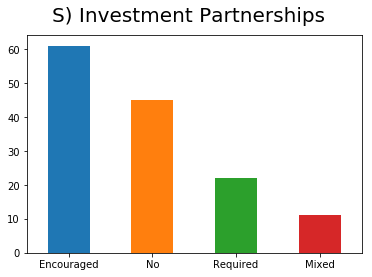

In [61]:
S = data.iloc[:,186:187]
graph_plot_sr(S,rot=0)

Text(0.5,0.98,'T) Partnerships with What Organization Types?')

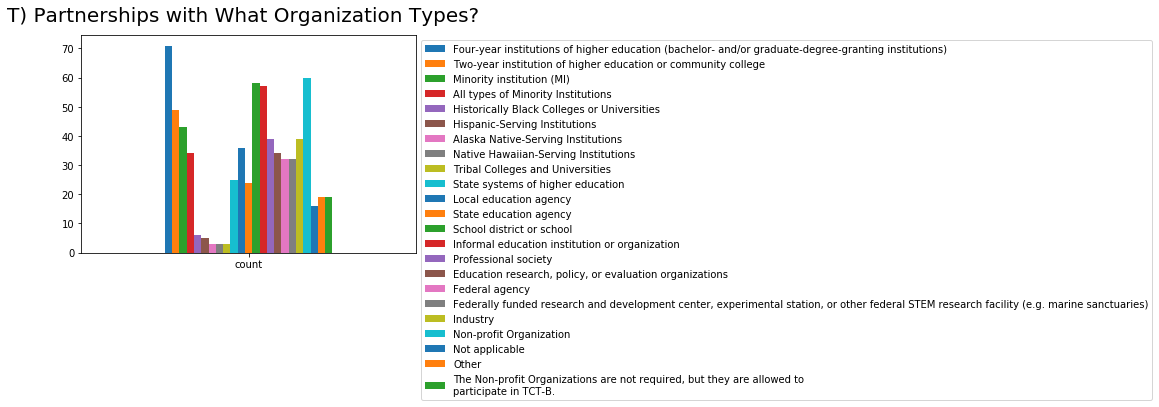

In [62]:
T = data.iloc[:,187:210]
graph_plot_df(T)

Text(0.5,0.98,'U) Measured Outputs')

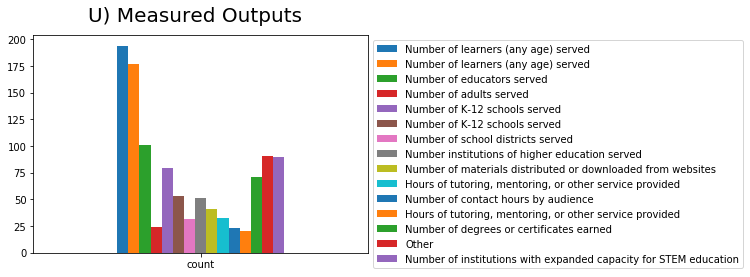

In [63]:
U = data.iloc[:,210:225]
graph_plot_df(U)

Text(0.5,0.98,'V) Outcomes Measured')

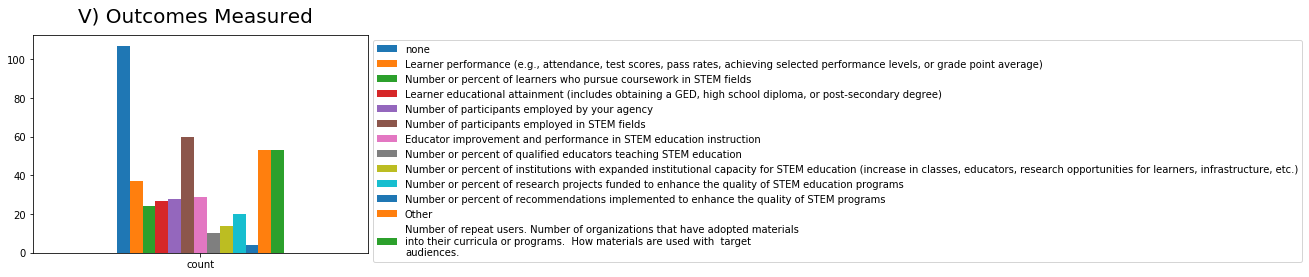

In [64]:
V = data.iloc[:,225:238]
graph_plot_df(V)

Text(0.5,0.98,'W) Measurement Instruments Used')

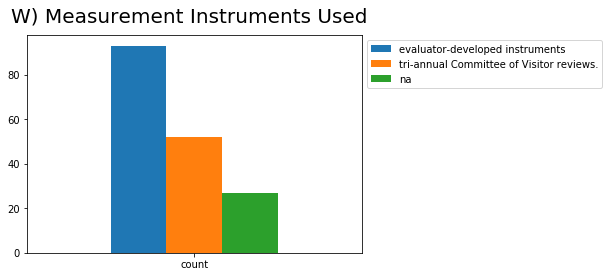

In [65]:
W = data.iloc[:,238:241]
graph_plot_df(W)

Text(0.5,0.98,'X) Evaluated Since 2005?')

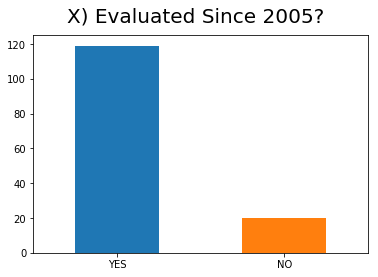

In [66]:
X_ = data.iloc[:,241:242]
graph_plot_sr(X_,rot=0)

Text(0.5,0.98,'Y1) Formative Evaluation Type')

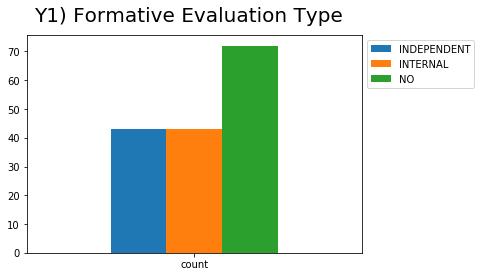

In [67]:
Y1 = data.iloc[:,242:245]
graph_plot_df(Y1)

Text(0.5,0.98,'Y2) Summative Evaluation Type')

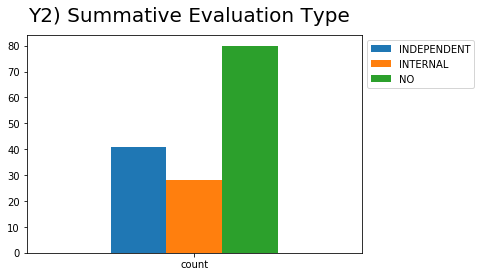

In [68]:
Y2 = data.iloc[:,245:248]
graph_plot_df(Y2)

Text(0.5,0.98,'Y3) Process or Implementation Evaluation Type')

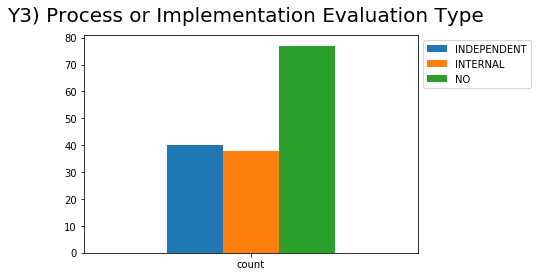

In [69]:
Y3 = data.iloc[:,248:251]
graph_plot_df(Y3)

Text(0.5,0.98,'Y4) Portfolio Evaluation/Review Type')

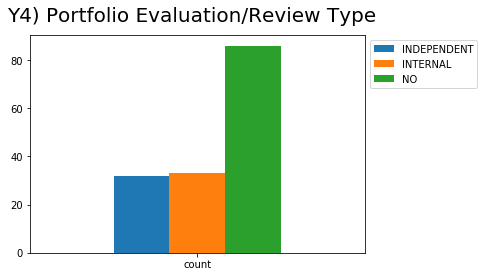

In [70]:
Y4 = data.iloc[:,251:254]
graph_plot_df(Y4)

Text(0.5,0.98,'Y5) Expert Review Type')

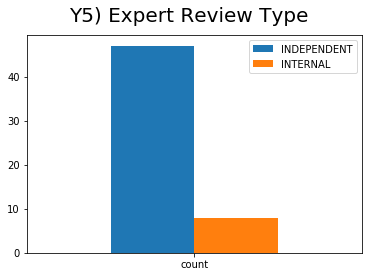

In [71]:
Y5 = data.iloc[:,254:256]
graph_plot_df(Y5)

# Stage 2.2: Solution

Calculating mutual_info_score of target variable created in stage 1 & all non-funding variables.

In [72]:
# Declaring Target varible for the Target column
Target = data['Target']

In [73]:
# Creating a separate dataframe for the features
features = pd.concat([agency,sub_agency,D,E,F1,F2,G1,G2,G3,H,I10,
            I11_1,I11_2,I1_1,I1_2,I2,I3,I4,I5,I6,I7,I8,
            I9,J,K,L,M,N,O,P,Q,R1_sub,R2_sub,S,T,U,V,W,X_,Y1,Y2,Y3,Y4,Y5],axis=1)

In [74]:
# Converting categorical variable into dummy/indicator variables.
features_vec = pd.get_dummies(features)

In [75]:
# Splitting the column names of features_vec in order to reduce the size of column names.
features_vec.columns = [[i.split(':', 1)[0] for i in features_vec.columns]]
#To get rid of duplicate columns
features_vec = features_vec.iloc[:,~features_vec.columns.duplicated()]

In [76]:
from sklearn.metrics import mutual_info_score

In [77]:
# Creating a list of mutual_info_score of target with all non-funding variables(features)
mi_score = [mutual_info_score(features_vec.iloc[:,i],Target) for i in range(len(features_vec.columns))]

In [78]:
# Creating a dataframe for mutual_info_score and Non Funding Variables.
MI = pd.DataFrame(data=mi_score,index=features_vec.columns.levels[0],columns=['Mutual Info Score'])
MI.index.name = 'Non Funding Variables'
MI.head()

,Mutual Info Score
Non Funding Variables,
Agency_Agriculture,0.009530
Agency_Commerce,0.001042
Agency_Defense,0.000046
Agency_Education,0.005529
Agency_Energy,0.000012


# Stage 3: Solutions

XGBoost model for features and target variable.

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [80]:
X = features_vec
y = Target

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
model = XGBClassifier(learning_rate=0.13,max_depth=3)

In [83]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.13, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [84]:
predictions = model.predict(X_test)

C:\Users\Khurmi\Envs\data-sci\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [85]:
accuracy = accuracy_score(y_test,predictions)

In [86]:
accuracy

0.631578947368421

In [87]:
roc_auc_score(y_test,predictions)

0.5725490196078432

## Improving our xgboost model according to feature importance values.

In [88]:
#threshold is set according to the feature_importance value.
selection = SelectFromModel(model, threshold=0.02, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
select_pred = selection_model.predict(select_X_test)

C:\Users\Khurmi\Envs\data-sci\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
select_accuracy = accuracy_score(y_test,select_pred)
select_accuracy

0.6447368421052632

In [90]:
feature_idx = selection.get_support()

In [91]:
# Total number of features
len(features_vec.columns)

991

In [92]:
# Total number of features selected after feature selection.
sum(feature_idx)

12

### Final roc_auc_score:

In [93]:
# Improved roc_auc_score after feature selection.
roc_auc_score(y_test,select_pred)

0.5925490196078431

### Observations:
We have observed that after performing feature selection on existing model and obtained
better results in terms of model accuracy and roc_auc score.